# Exercise: confidence intervals

Suppose I survey $n$ people, chosen randomly in Eugene,
asking how many miles they commute to work.

*Claim:* there is a 95% probability that the mean distance commuted
by people in Eugene
is between $\bar x - 1.96 s / \sqrt{n}$
and  $\bar x - 1.96 s / \sqrt{n}$,
where $\bar x$ is my sample mean, $s$ is my sample SD,
and $n$ is my sample size.

*Exercise:*
come up with a distribution for the number of miles commuted by someone in Eugene.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

prop_zero = 0.15  # proportion of people working at home
prop_faraway = 0.05
mean_nearby = 9  # miles, mean distance for nearby people
sd_nearby = 3  # miles, sd distance for nearby people
mean_faraway = 60 # miles, mean of Exponential for 'faraway'

def sample(n):
    # sample size is n
    x = np.repeat(0.0, n)
    where = rng.choice(['home', 'near', 'far'], size=n, p=[prop_zero, 1 - prop_zero - prop_faraway, prop_faraway])
    x[where == 'near'] = rng.normal(loc=mean_nearby, scale=sd_nearby, size=np.sum(where == 'near'))
    x[where == 'far'] = rng.exponential(scale=mean_faraway, size=np.sum(where == 'far'))
    return x

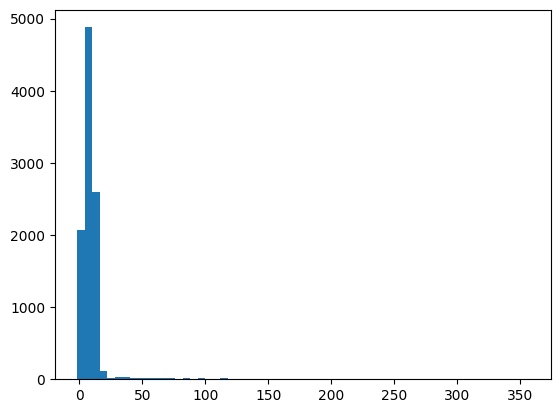

In [2]:
x = sample(n = 10000)
plt.hist(x, bins=60);

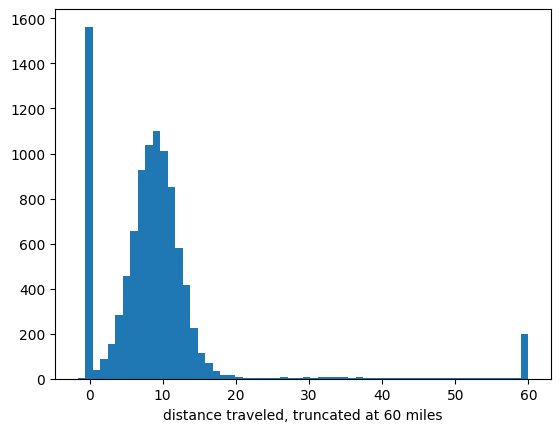

In [3]:
plt.hist(np.fmin(60, x), bins=60)
plt.xlabel("distance traveled, truncated at 60 miles");

In [4]:
from scipy.stats import t

def get_cis(x):
    xbar = np.mean(x)
    s = np.std(x)
    n = len(x)
    tstar = t.ppf(.975, df=n-2)
    return (xbar - tstar * s / np.sqrt(n), xbar + tstar * s / np.sqrt(n))

In [5]:
n = 100  # sample size
num_samples = 1000
cis = np.array([get_cis(sample(n)) for _ in range(num_samples)])

But wait, what's the true mean?
Let's find out with simulation:

In [6]:
ns = 100000
np.mean(sample(ns)), np.mean(sample(ns)), np.mean(sample(ns))

(10.192560849273882, 10.20505804800794, 10.1681904399282)

In [7]:
true_mean = np.mean(sample(1_000_000))
np.mean(np.logical_and(
    cis[:, 0] <= true_mean,
    cis[:, 1] >= true_mean
))

0.818

We see that our "95% confidence intervals" are only covering the true value
about 80% of the time. (!!?!?!)

Recall that the construction of the confidence interval is an "asymptotic" result:
it's guaranteed to be better, the bigger $n$ is,
but not exactly true at any particular value of $n$
*unless* the data are Normally distributed.

We've got a lot of pretty big outliers, so the data are very non-Normal,
and $n=100$ is pretty big, but apparently not big enough.

*Note:* we verified this interpretation by setting the proprotion
of faraway commuters to 0 and re-running.